# Необходимые библиотеки



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

# Задача 7.1.4

In [ ]:
# Шаг 1: Введём диф. уравнение с начальным условием (задача Коши)
def f(t, y):
    return -y * t * math.tan(t) + math.cos(t)**2

t0 = math.pi / 4
y0 = 0.5
T = t0 + 1
h = 0.1

# Вывод начальных данных для проверки
print(f"Начальное значение t0: {t0:.4f}")
print(f"Начальное значение y0: {y0:.4f}")
print(f"Конечное значение T: {T:.4f}")


Начальное значение t0: 0.7854
Начальное значение y0: 0.5000
Конечное значение T: 1.7854


In [ ]:
# Шаг 2: Реализуем метод Эйлера
def euler(f, t0, y0, T, h):
    """
    Реализует метод Эйлера для численного решения задачи Коши для ОДУ первого порядка.

    Параметры:
    f : function
        Функция правой части ОДУ, f(t, y), которая принимает два аргумента: текущее время t и текущее значение функции y.
    t0 : float
        Начальное значение времени.
    y0 : float
        Начальное значение функции.
    T : float
        Конечное значение времени, до которого следует проводить интегрирование.
    h : float
        Шаг интегрирования.

    Возвращает:
    tuple
        Два numpy массива: массив значений времени и массив значений функции y в соответствующих временных точках.
    """
    n_steps = int((T - t0) / h)
    t_values = np.zeros(n_steps + 1)
    y_values = np.zeros(n_steps + 1)

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]

        y_values[i + 1] = y + h * f(t, y)
        t_values[i + 1] = t + h

    return t_values, y_values

# Вычисление приближенного решения задачи Коши
t_values, y_values = euler(f, t0, y0, T, h)

# Вывод результатов
for t, y in zip(t_values, y_values):
    print(f"t = {t:.4f}, y = {y:.4f}")

t = 0.7854, y = 0.5000
t = 0.8854, y = 0.5107
t = 0.9854, y = 0.4955
t = 1.0854, y = 0.4524
t = 1.1854, y = 0.3811
t = 1.2854, y = 0.2838
t = 1.3854, y = 0.1674
t = 1.4854, y = 0.0471
t = 1.5854, y = -0.0339
t = 1.6854, y = -0.4023
t = 1.7854, y = -0.9901


In [ ]:
# Шаг 3: реализовать метод Рунге-Кутты 4-ого порядка
def rkfixed(f, t0, y0, T, h):
    """
    Реализует метод Рунге-Кутты 4-го порядка для численного решения задачи Коши для ОДУ первого порядка.

    Параметры:
    f : function
        Функция правой части ОДУ, f(t, y), которая принимает два аргумента: текущее время t и текущее значение функции y.
    t0 : float
        Начальное значение времени.
    y0 : float
        Начальное значение функции.
    T : float
        Конечное значение времени, до которого следует проводить интегрирование.
    h : float
        Шаг интегрирования.

    Возвращает:
    tuple
        Два numpy массива: массив значений времени и массив значений функции y в соответствующих временных точках.
    """
    n_steps = int((T - t0) / h)
    t_values = np.zeros(n_steps + 1)
    y_values = np.zeros(n_steps + 1)

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]

        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        y_values[i + 1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t_values[i + 1] = t + h

    return t_values, y_values

# Вычисление приближенного решения задачи Коши методом Рунге-Кутты 4-го порядка
t_values, y_values = rkfixed(f, t0, y0, T, h)

# Вывод результатов
for t, y in zip(t_values, y_values):
    print(f"t = {t:.4f}, y = {y:.4f}")

t = 0.7854, y = 0.5000
t = 0.8854, y = 0.4985
t = 0.9854, y = 0.4718
t = 1.0854, y = 0.4196
t = 1.1854, y = 0.3437
t = 1.2854, y = 0.2492
t = 1.3854, y = 0.1453
t = 1.4854, y = 0.0495
t = 1.5854, y = -0.2058
t = 1.6854, y = -4.4835
t = 1.7854, y = -13.0823


# Задача 7.2.2

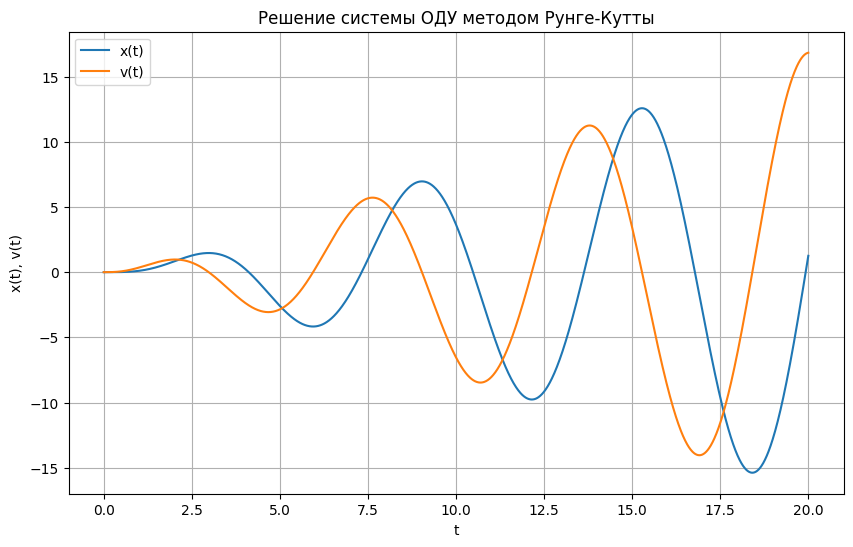

In [ ]:

# Определение функций для системы ОДУ
def f(t, y):
    return np.array([y[1], -H/m*y[0] - k/m*y[1] + 1/m*t*np.sin(t)])

# Метод Рунге-Кутты 4-го порядка
def rk4_step(t, y, h, f):
    '''
    Параметры:
        t (float): Текущее значение независимой переменной.
        y (array): Массив значений зависимых переменных в текущий момент времени.
                   Должен содержать два элемента: [y1, y2], где y1 и y2 - значения
                   функций системы в текущий момент времени.
        h (float): Шаг интегрирования.
        f (function): Функция правой части СОДУ. Должна принимать два аргумента,
                      t и y, где t - текущее значение независимой переменной,
                      а y - массив значений зависимых переменных.

    Возвращает:
        array: Массив значений зависимых переменных после выполнения шага метода Рунге-Кутты.
    '''
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Начальные условия и параметры
x0 = 0
v0 = 0
H = 1
k = 1
m = 0.5
T = 20
h = 0.01

# Массивы для хранения результатов
t_values = np.arange(0, T+h, h)
x_values = np.zeros_like(t_values)
v_values = np.zeros_like(t_values)

# Начальные условия
x_values[0] = x0
v_values[0] = v0

# Численное решение с помощью метода Рунге-Кутты
for i in range(1, len(t_values)):
    y = np.array([x_values[i-1], v_values[i-1]])
    y = rk4_step(t_values[i-1], y, h, f)
    x_values[i] = y[0]
    v_values[i] = y[1]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, v_values, label='v(t)')
plt.title('Решение системы ОДУ методом Рунге-Кутты')
plt.xlabel('t')
plt.ylabel('x(t), v(t)')
plt.legend()
plt.grid(True)
plt.show()


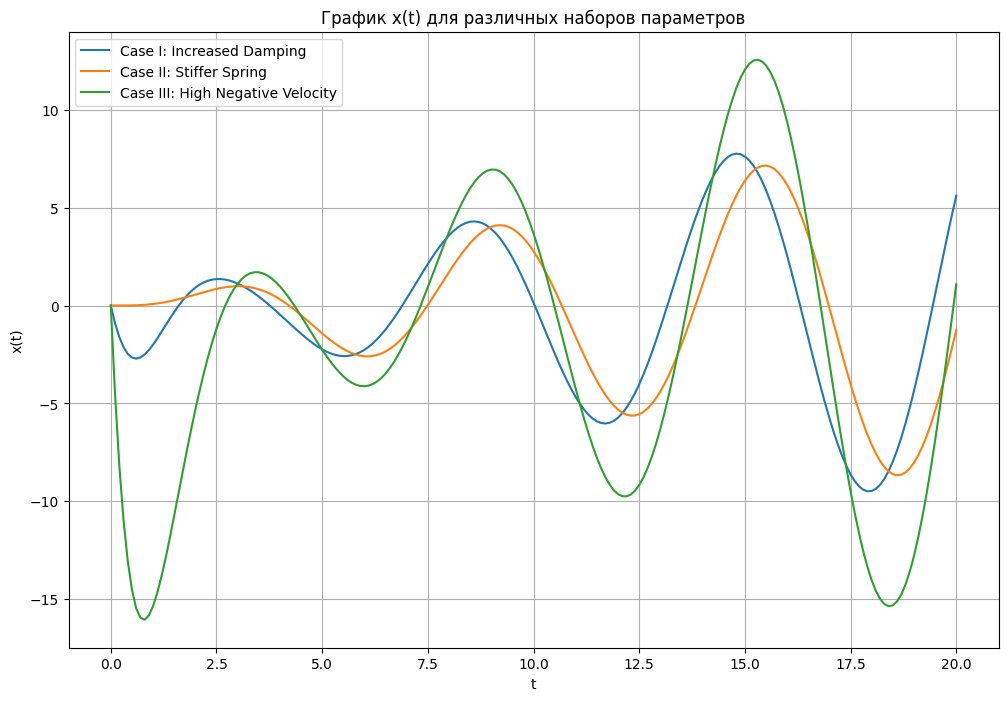

In [ ]:
# Функция для численного решения системы ОДУ
def solve_ode(H, k, m, v0):
    # Определение функций для системы ОДУ
    def f(t, y):
        return np.array([y[1], -H/m*y[0] - k/m*y[1] + 1/m*t*np.sin(t)])

    # Метод Рунге-Кутты 4-го порядка
    def rk4_step(t, y, h, f):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        return y + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Начальные условия и параметры
    x0 = 0
    T = 20
    h = 0.1

    # Массивы для хранения результатов
    t_values = np.arange(0, T+h, h)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)

    # Начальные условия
    x_values[0] = x0
    v_values[0] = v0

    # Численное решение с помощью метода Рунге-Кутты
    for i in range(1, len(t_values)):
        y = np.array([x_values[i-1], v_values[i-1]])
        y = rk4_step(t_values[i-1], y, h, f)
        x_values[i] = y[0]
        v_values[i] = y[1]

    return t_values, x_values, v_values

# Наборы параметров
parameters = [
    {"H": 2, "k": 1, "m": 0.5, "v0": -10, "label": "Case I: Increased Damping"},
    {"H": 1, "k": 2, "m": 0.5, "v0": 0, "label": "Case II: Stiffer Spring"},
    {"H": 1, "k": 1, "m": 0.5, "v0": -50, "label": "Case III: High Negative Velocity"}
]

# Построение графиков
plt.figure(figsize=(12, 8))
for param in parameters:
    t, x, v = solve_ode(param["H"], param["k"], param["m"], param["v0"])
    plt.plot(t, x, label=param["label"])

plt.title('График x(t) для различных наборов параметров')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


# Задача 7.6.2

In [ ]:
def euler_method(A, Y0, h, n):
    """
    Решение системы ОДУ первого порядка с постоянными коэффициентами методом явного Эйлера.

    Параметры:
    A (numpy.ndarray): Матрица коэффициентов системы.
    Y0 (numpy.ndarray): Вектор начальных условий.
    h (float): Шаг интегрирования.
    n (int): Количество шагов.

    Возвращает:
    numpy.ndarray: Массив значений решения на каждом шаге интегрирования.
    """
    Y = np.zeros((n+1, len(Y0)))
    Y[0] = Y0.T
    for i in range(n):
        Y[i+1] = Y[i] + h * np.dot(A, Y[i])
    return Y

# Данные задачи
A = np.array([[-13.237, 15.299], [33.885, 522.183]])
Y0 = np.array([[2], [0]])

B = np.array([[-6.905, 0.03], [-0.145, -6.095]])
Z0 = np.array([[1], [5]])

# Параметры
h = 0.01
n = int(1 / h)

# Решение задачи для системы с матрицей A
Y = euler_method(A, Y0, h, n)
print("Решение для системы с матрицей A на первом шаге:")
print(Y[1])

# Решение задачи для системы с матрицей B
Z = euler_method(B, Z0, h, n)
print("Решение для системы с матрицей B на первом шаге:")
print(Z[1])


Решение для системы с матрицей A на первом шаге:
[1.73526 0.6777 ]
Решение для системы с матрицей B на первом шаге:
[0.93245 4.6938 ]


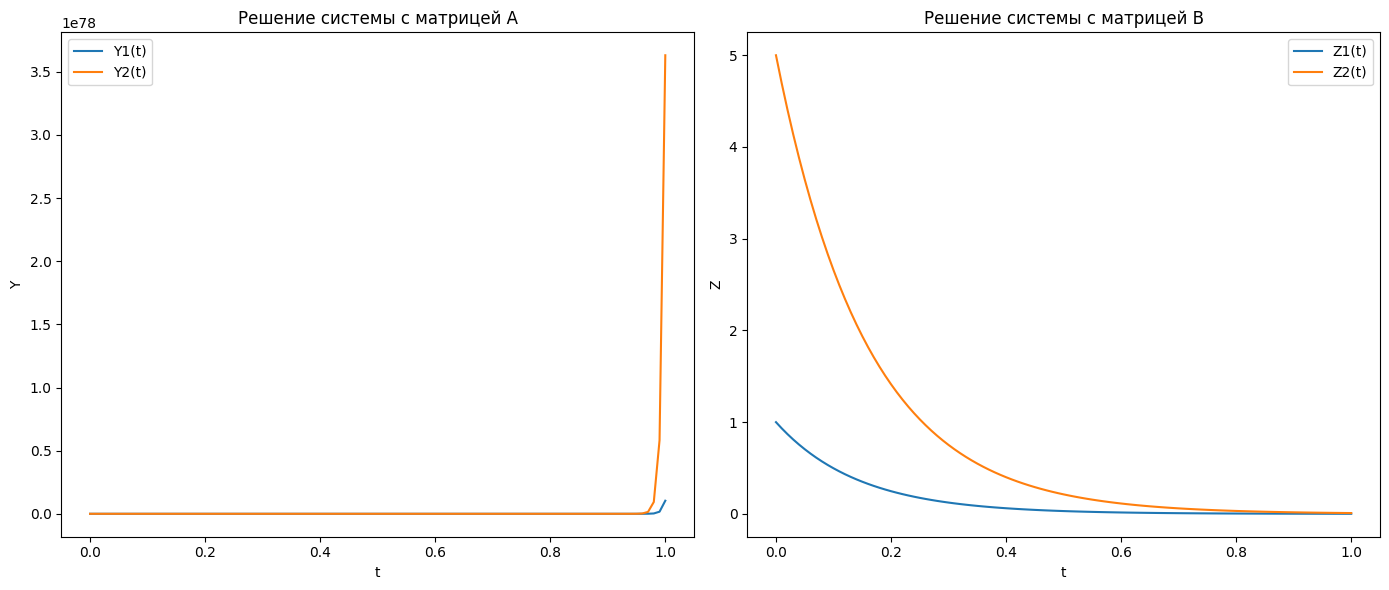

In [ ]:
# Решение задачи для системы с матрицей A
Y = euler_method(A, Y0, h, n)

# Решение задачи для системы с матрицей B
Z = euler_method(B, Z0, h, n)

# Построение графиков для наглядности
t = np.linspace(0, 1, n+1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, Y[:, 0], label='Y1(t)')
plt.plot(t, Y[:, 1], label='Y2(t)')
plt.title('Решение системы с матрицей A')
plt.xlabel('t')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, Z[:, 0], label='Z1(t)')
plt.plot(t, Z[:, 1], label='Z2(t)')
plt.title('Решение системы с матрицей B')
plt.xlabel('t')
plt.ylabel('Z')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Матрица A
A = np.array([[-13.237, 15.299], [33.885, 522.183]])

# Вычисление собственных значений матрицы A
eigenvalues_A = np.linalg.eigvals(A)

# Матрица B
B = np.array([[-6.905, 0.03], [-0.145, -6.095]])

# Вычисление собственных значений матрицы B
eigenvalues_B = np.linalg.eigvals(B)

print("Собственные значения матрицы A:", eigenvalues_A)
print("Собственные значения матрицы B:", eigenvalues_B)

Собственные значения матрицы A: [-14.20347965 523.14947965]
Собственные значения матрицы B: [-6.89959354 -6.10040646]


**Вывод:** Матрица А является неустойчивым для шага h = 0.01, так как спектральный радиус по модулю очень большой, из-за чего нужно брать шаг больше. Для матрицы B задача является устойчивым для метода Эйлера, так как абс. величина собственных значений довольно мала.

In [ ]:
# Шаг 2:

# Коэффициенты жесткости
kappa_A = np.max(np.abs(eigenvalues_A)) / np.min(np.abs(eigenvalues_A))
kappa_B = np.max(np.abs(eigenvalues_B)) / np.min(np.abs(eigenvalues_B))

print("Коэффициент жесткости для системы с матрицей A:", kappa_A)
print("Коэффициент жесткости для системы с матрицей B:", kappa_B)

Коэффициент жесткости для системы с матрицей A: 36.832487016036424
Коэффициент жесткости для системы с матрицей B: 1.1310055473648157


**Вывод:** Матрица А является более жёсткой, чем B, однако обе системы не являются жёсткими, так как коэффициенты жёсткости на проходят порог в 1000

In [ ]:
# Шаг 3:
'''
Для того, чтобы найти h* шаг для матрицы А, воспользуемся неравенствым
что h* < 2 / P(A), где Р(А) - спектральный радиус матрицы А
'''
# Спектральный радиус матрицы A
rho_A = 523.15

# Оценка шага h*
h_star = 2 / rho_A
print("Оценка шага h*:", h_star)

Оценка шага h*: 0.003822995316830737


In [ ]:
# Шаг 4:
def implicit_euler_method(A, Y0, h, n):
    """
    Решение системы ОДУ первого порядка с постоянными коэффициентами по неявному методу Эйлера.

    Параметры:
    A (numpy.ndarray): Матрица коэффициентов системы.
    Y0 (numpy.ndarray): Вектор начальных условий.
    h (float): Шаг интегрирования.
    n (int): Количество шагов.

    Возвращает:
    numpy.ndarray: Массив значений решения на каждом шаге интегрирования.
    """
    m = len(Y0)
    Y = np.zeros((n+1, m))
    Y[0] = Y0.T

    I = np.eye(m)  # Единичная матрица того же размера, что и A
    for i in range(n):
        Y[i+1] = np.linalg.solve(I - h * A, Y[i])

    return Y

# Пример использования функции

# Матрица A
A = np.array([[-13.237, 15.299], [33.885, 522.183]])
# Начальные условия Y0
Y0 = np.array([[2], [0]])
# Параметры
h = 0.01
n = int(1 / h)

# Решение задачи по неявному методу Эйлера
Y = implicit_euler_method(A, Y0, h, n)
print("Решение для системы с матрицей A по неявному методу Эйлера:")
print(Y)

Решение для системы с матрицей A по неявному методу Эйлера:
[[ 2.00000000e+00  0.00000000e+00]
 [ 1.74726022e+00 -1.40237557e-01]
 [ 1.53089885e+00 -8.96548456e-02]
 [ 1.34027766e+00 -8.63365508e-02]
 [ 1.17364021e+00 -7.37479796e-02]
 [ 1.02766217e+00 -6.50133584e-02]
 [ 8.99854838e-01 -5.68242809e-02]
 [ 7.87939251e-01 -4.97814773e-02]
 [ 6.89943461e-01 -4.35843850e-02]
 [ 6.04135196e-01 -3.81651621e-02]
 [ 5.28998949e-01 -3.34182408e-02]
 [ 4.63207380e-01 -2.92620925e-02]
 [ 4.05598308e-01 -2.56227499e-02]
 [ 3.55154071e-01 -2.24360543e-02]
 [ 3.10983582e-01 -1.96456826e-02]
 [ 2.72306573e-01 -1.72023506e-02]
 [ 2.38439822e-01 -1.50628952e-02]
 [ 2.08785076e-01 -1.31895239e-02]
 [ 1.82818489e-01 -1.15491436e-02]
 [ 1.60081365e-01 -1.01127774e-02]
 [ 1.40172056e-01 -8.85505187e-03]
 [ 1.22738866e-01 -7.75374962e-03]
 [ 1.07473841e-01 -6.78941627e-03]
 [ 9.41073258e-02 -5.94501699e-03]
 [ 8.24032035e-02 -5.20563560e-03]
 [ 7.21547222e-02 -4.55821102e-03]
 [ 6.31808439e-02 -3.99130660e

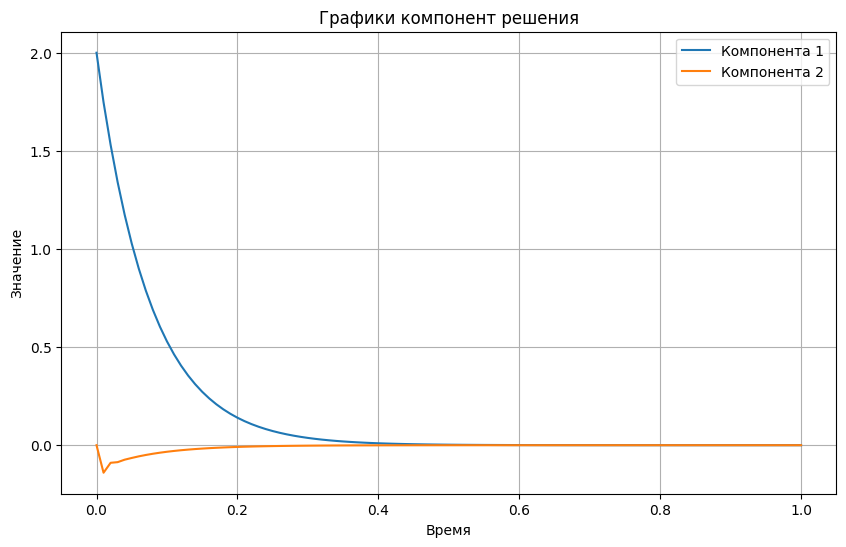

In [ ]:
# Визуализация результатов
t_values = np.linspace(0, 1, n+1)  # Временные шаги

plt.figure(figsize=(10, 6))
plt.plot(t_values, Y[:, 0], label='Компонента 1')
plt.plot(t_values, Y[:, 1], label='Компонента 2')
plt.title('Графики компонент решения')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()